In [1]:
Megan Vaughn

STA4365 

AI II Final Project

SyntaxError: invalid syntax (2002992112.py, line 1)

In [10]:
# data set

# Load the CSV file into a pandas DataFrame
csv_file_path = '/Users/meganvaughn/Downloads/Glassdoor Gender Pay Gap.csv'  # Replace 'your_data.csv' with the path to your CSV file
data = pd.read_csv(csv_file_path)

data

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [50]:
# labels

print("x1: JobTitle")
print("x2: Gender")
print("x3: Age")
print("x4: PerfEval")
print("x5: Education")
print("x6: Dept")
print("x7: Seniority")
print("x8: Base Pay")
print("x9: Bonus")
print("x10: Constant")


x1: JobTitle
x2: Gender
x3: Age
x4: PerfEval
x5: Education
x6: Dept
x7: Seniority
x8: Base Pay
x9: Bonus
x10: Constant


In [33]:
# logistic regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# Load the CSV file into a pandas DataFrame
csv_file_path = '/Users/meganvaughn/Downloads/Glassdoor Gender Pay Gap.csv'
data = pd.read_csv(csv_file_path)

# Assuming 'BasePay' is the target variable
target_column = 'BasePay'

# Extracting non-numeric columns as categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Remove the target column from the list of categorical columns if it's present
if target_column in categorical_cols:
    categorical_cols.remove(target_column)

# Separating features and target variable
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target variable

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocess the features
X_processed = pipeline.fit_transform(X)

# Adding intercept to the features
X_processed = sm.add_constant(X_processed)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Fitting the logistic regression model
logit_model = sm.OLS(y_train, X_train)
result = logit_model.fit()

# Print summary of the logistic regression model
print(result.summary())

# Predicting the target variable on the testing set
y_pred = result.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


                            OLS Regression Results                            
Dep. Variable:                BasePay   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     192.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.49e-291
Time:                        18:12:59   Log-Likelihood:                -8518.0
No. Observations:                 800   AIC:                         1.708e+04
Df Residuals:                     778   BIC:                         1.718e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.282e+04   1669.977      7.675      0.0

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

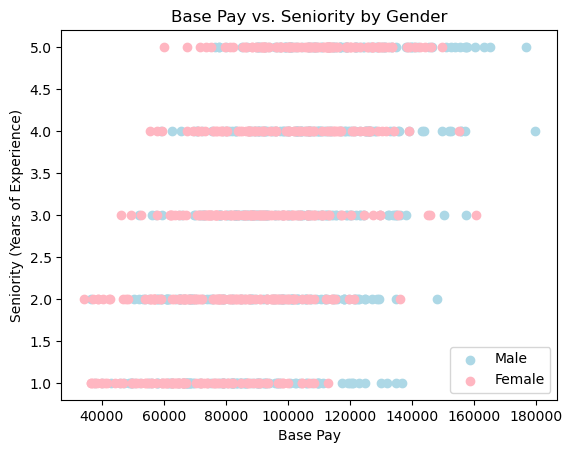

In [86]:
# scatterplot

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
csv_file_path = '/Users/meganvaughn/Downloads/Glassdoor Gender Pay Gap.csv'
data = pd.read_csv(csv_file_path)

# Split the data into male and female subsets
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Plot male and female data points in different colors
plt.scatter(male_data['BasePay'], male_data['Seniority'], color='lightblue', label='Male')
plt.scatter(female_data['BasePay'], female_data['Seniority'], color='lightpink', label='Female')

# Add labels and title
plt.xlabel('Base Pay')
plt.ylabel('Seniority (Years of Experience)')
plt.title('Base Pay vs. Seniority by Gender')
plt.legend()

# Show the plot
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.5470781944799549
For n_clusters = 3, the average silhouette_score is : 0.46526387144817555
For n_clusters = 4, the average silhouette_score is : 0.4968318139993771
For n_clusters = 5, the average silhouette_score is : 0.45670181882509286
For n_clusters = 6, the average silhouette_score is : 0.4475026360735308
Optimal number of clusters: 2


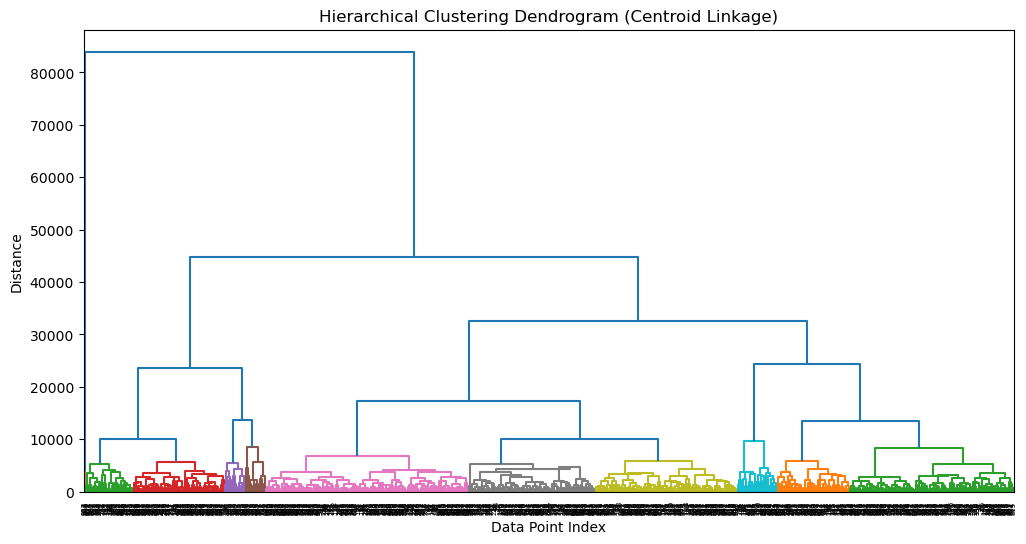

For n_clusters = 2, the average silhouette_score is : 0.6086909113841734
For n_clusters = 3, the average silhouette_score is : 0.5987037576961268
For n_clusters = 4, the average silhouette_score is : 0.514177419459881
For n_clusters = 5, the average silhouette_score is : 0.49513451800229963
For n_clusters = 6, the average silhouette_score is : 0.49499066296719024
Optimal number of clusters: 2


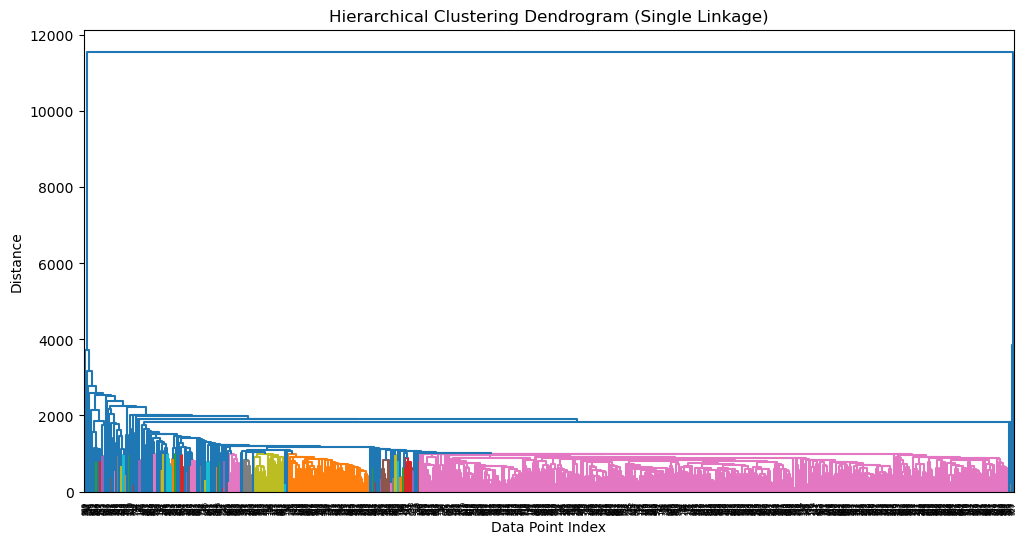

For n_clusters = 2, the average silhouette_score is : 0.4825549266007257
For n_clusters = 3, the average silhouette_score is : 0.5052366639844164
For n_clusters = 4, the average silhouette_score is : 0.49568989485808485
For n_clusters = 5, the average silhouette_score is : 0.4652387686261492
For n_clusters = 6, the average silhouette_score is : 0.49076480303897585
Optimal number of clusters: 3


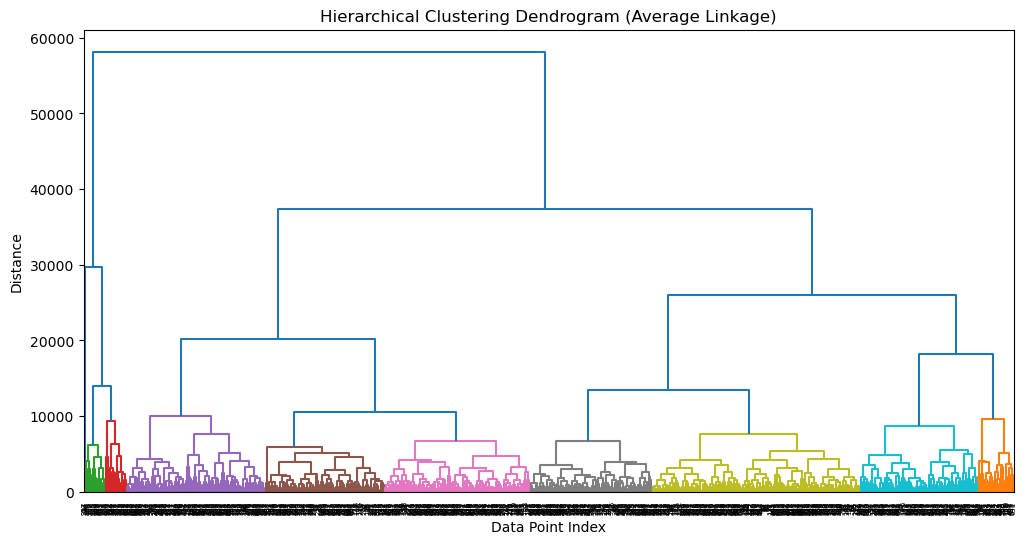

For n_clusters = 2, the average silhouette_score is : 0.4771926945283121
For n_clusters = 3, the average silhouette_score is : 0.38006653818235336
For n_clusters = 4, the average silhouette_score is : 0.4796928647507109
For n_clusters = 5, the average silhouette_score is : 0.4538084180434252
For n_clusters = 6, the average silhouette_score is : 0.431218104967798
Optimal number of clusters: 4


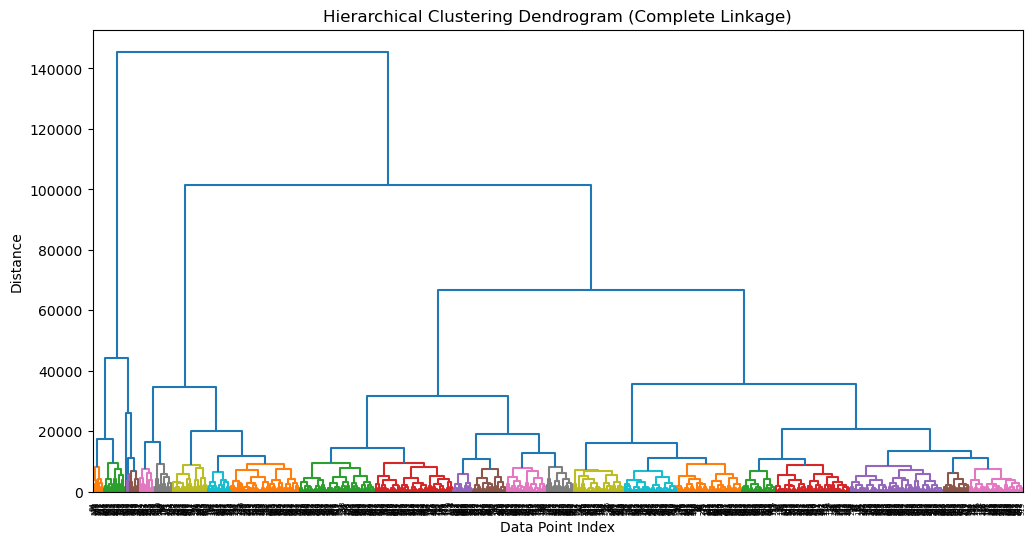

In [55]:
# hierarchical clustering with centroid, single, average, and complete linkages

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load the CSV file into a pandas DataFrame
csv_file_path = '/Users/meganvaughn/Downloads/Glassdoor Gender Pay Gap.csv'
data = pd.read_csv(csv_file_path)

# Extracting non-numeric columns as categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Preprocess the features
X_processed = preprocessor.fit_transform(data)

# Define a range of numbers of clusters to try
range_n_clusters = [2, 3, 4, 5, 6]

# Initialize list to store silhouette scores
silhouette_scores = []

# Loop through different numbers of clusters
for n_clusters in range_n_clusters:
    # Perform centroid linkage hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clustering.fit_predict(X_processed)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Find the optimal number of clusters that maximizes silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_n_clusters}")
# Compute hierarchical clustering with centroid linkage
Z_centroid = linkage(X_processed, method='centroid')

# Plot dendrogram with centroid linkage
plt.figure(figsize=(12, 6))
dendrogram(Z_centroid, color_threshold=10000)
plt.title('Hierarchical Clustering Dendrogram (Centroid Linkage)')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()





# Compute hierarchical clustering with single linkage
Z_single = linkage(X_processed, method='single')

# Define a range of numbers of clusters to try
range_n_clusters = [2, 3, 4, 5, 6]

# Initialize list to store silhouette scores
silhouette_scores = []

# Loop through different numbers of clusters
for n_clusters in range_n_clusters:
    # Perform single linkage hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    cluster_labels = clustering.fit_predict(X_processed)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Find the optimal number of clusters that maximizes silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_n_clusters}")

# Plot dendrogram with single linkage
plt.figure(figsize=(12, 6))
dendrogram(Z_single, color_threshold=1000)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()





# Compute hierarchical clustering with average linkage
Z_avg = linkage(X_processed, method='average')

# Define a range of numbers of clusters to try
range_n_clusters = [2, 3, 4, 5, 6]

# Initialize list to store silhouette scores
silhouette_scores = []

# Loop through different numbers of clusters
for n_clusters in range_n_clusters:
    # Perform average linkage hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = clustering.fit_predict(X_processed)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Find the optimal number of clusters that maximizes silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_n_clusters}")

# Plot dendrogram with average linkage
plt.figure(figsize=(12, 6))
dendrogram(Z_avg, color_threshold=10000)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()





# Compute hierarchical clustering with complete linkage
Z_comp = linkage(X_processed, method='complete')

# Define a range of numbers of clusters to try
range_n_clusters = [2, 3, 4, 5, 6]

# Initialize list to store silhouette scores
silhouette_scores = []

# Loop through different numbers of clusters
for n_clusters in range_n_clusters:
    # Perform complete linkage hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    cluster_labels = clustering.fit_predict(X_processed)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Find the optimal number of clusters that maximizes silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_n_clusters}")

# Plot dendrogram with complete linkage
plt.figure(figsize=(12, 6))
dendrogram(Z_comp, color_threshold=10000)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

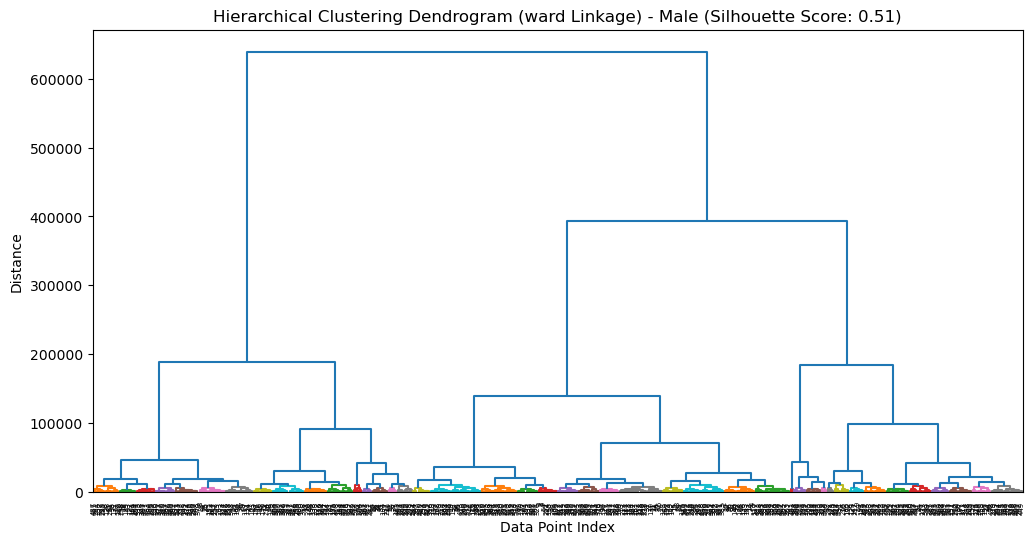

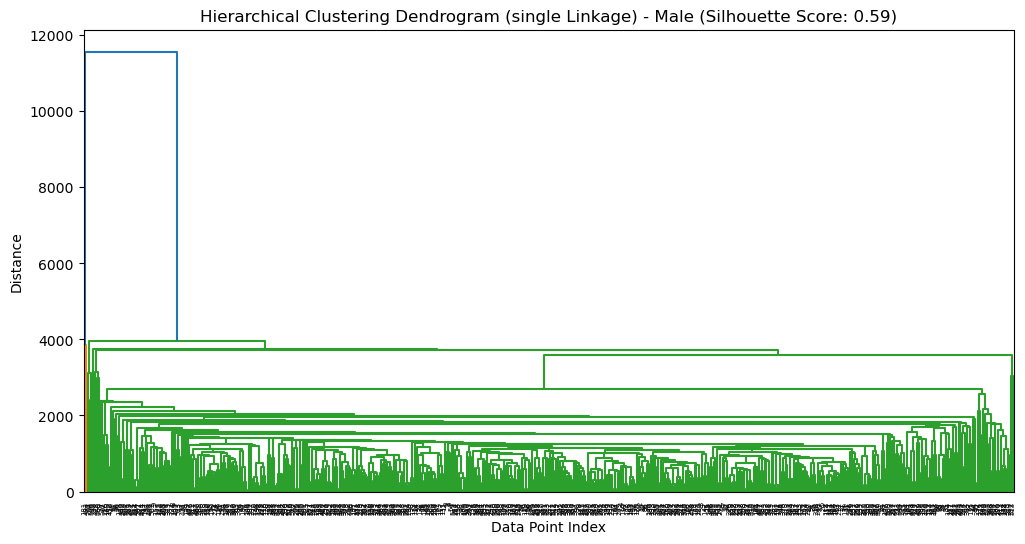

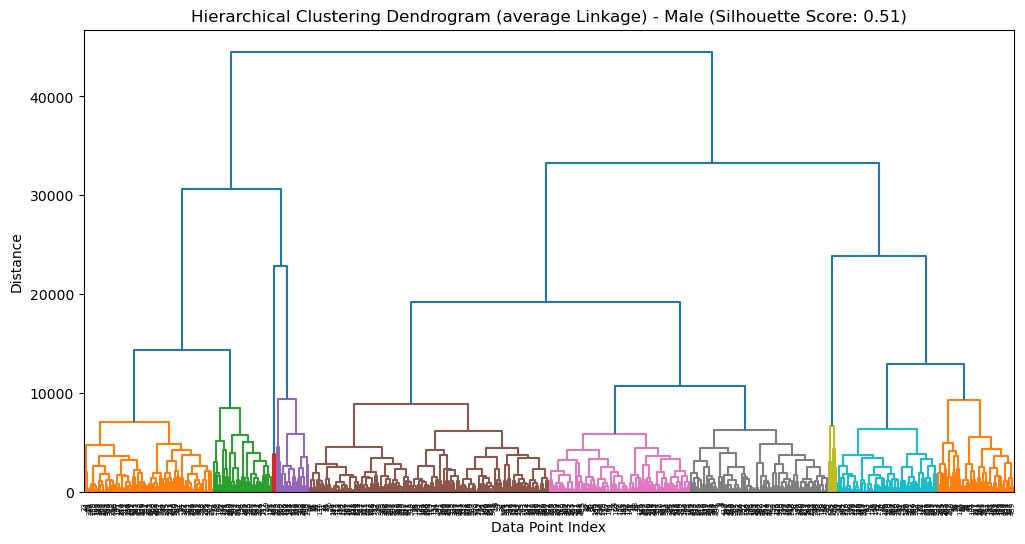

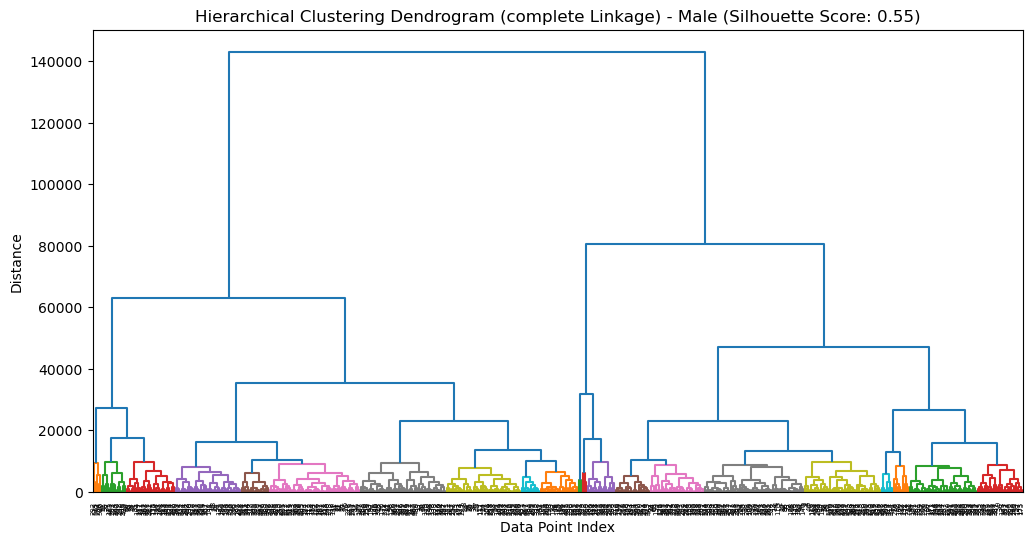

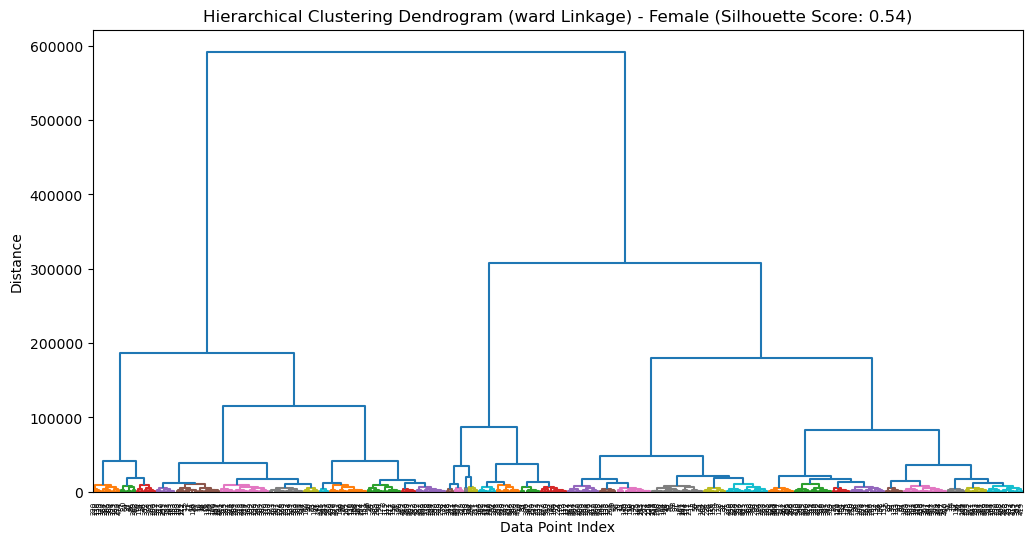

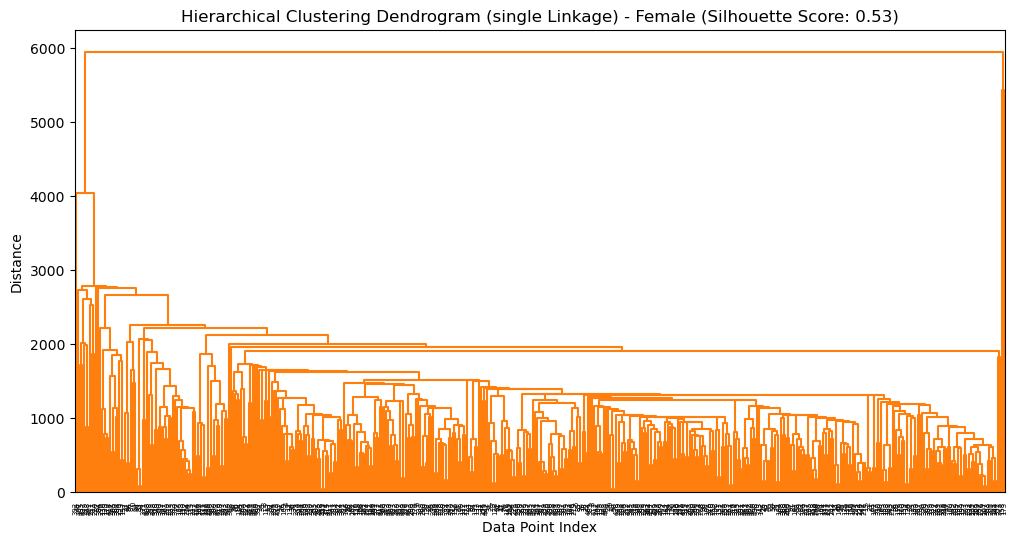

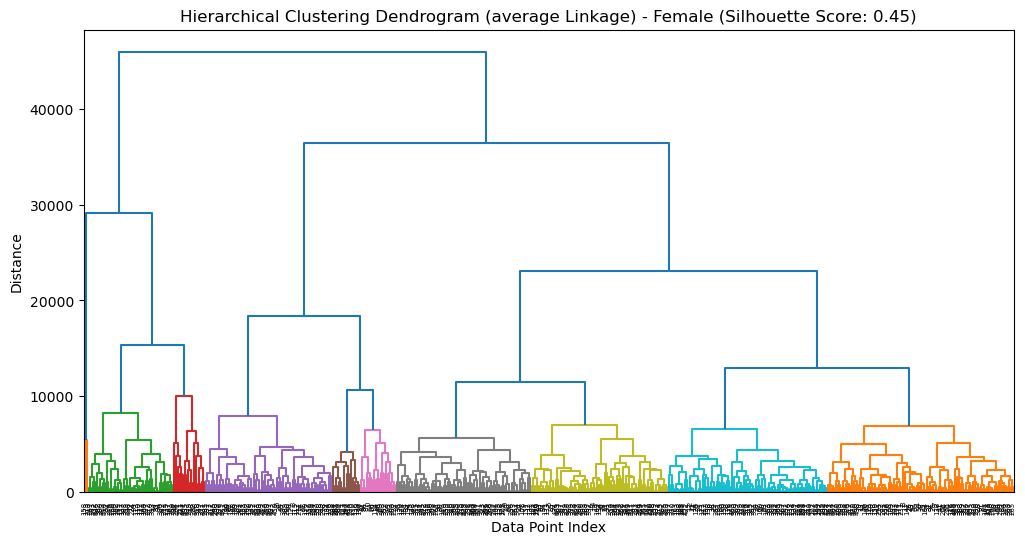

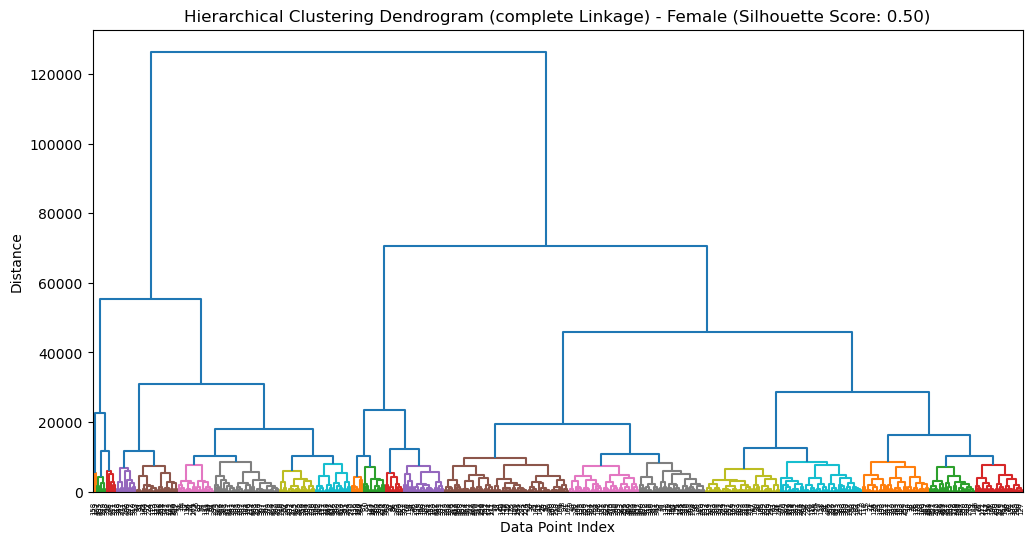

In [79]:
# hierarchical male and female

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load the CSV file into a pandas DataFrame
csv_file_path = '/Users/meganvaughn/Downloads/Glassdoor Gender Pay Gap.csv'
data = pd.read_csv(csv_file_path)

# Split the data into male and female subsets
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Extracting non-numeric columns as categorical columns for male and female data
categorical_cols_male = male_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols_female = female_data.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps for male and female data
preprocessor_male = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols_male)
    ],
    remainder='passthrough'
)

preprocessor_female = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols_female)
    ],
    remainder='passthrough'
)

# Preprocess the features for male and female data
X_processed_male = preprocessor_male.fit_transform(male_data)
X_processed_female = preprocessor_female.fit_transform(female_data)

# Define a function to perform hierarchical clustering, compute silhouette scores, and plot dendrogram
def hierarchical_clustering_and_plot(X_processed, linkage_method, gender):
    Z = linkage(X_processed, method=linkage_method)
    
    # Compute silhouette score
    clustering = AgglomerativeClustering(n_clusters=2, linkage=linkage_method)
    cluster_labels = clustering.fit_predict(X_processed)
    silhouette_avg = silhouette_score(X_processed, cluster_labels)
    
    plt.figure(figsize=(12, 6))
    dendrogram(Z, color_threshold=10000)
    plt.title(f'Hierarchical Clustering Dendrogram ({linkage_method} Linkage) - {gender} (Silhouette Score: {silhouette_avg:.2f})')
    plt.xlabel('Data Point Index')
    plt.ylabel('Distance')
    plt.show()

# Perform hierarchical clustering and plot dendrogram for male data with all linkage methods
for linkage_method in ['ward', 'single', 'average', 'complete']:
    hierarchical_clustering_and_plot(X_processed_male, linkage_method, 'Male')

# Perform hierarchical clustering and plot dendrogram for female data with all linkage methods
for linkage_method in ['ward', 'single', 'average', 'complete']:
    hierarchical_clustering_and_plot(X_processed_female, linkage_method, 'Female')



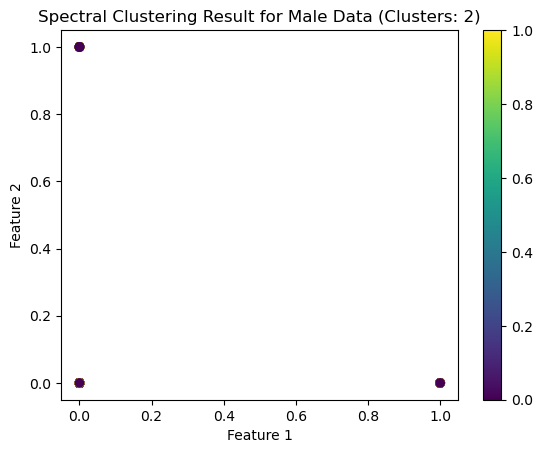

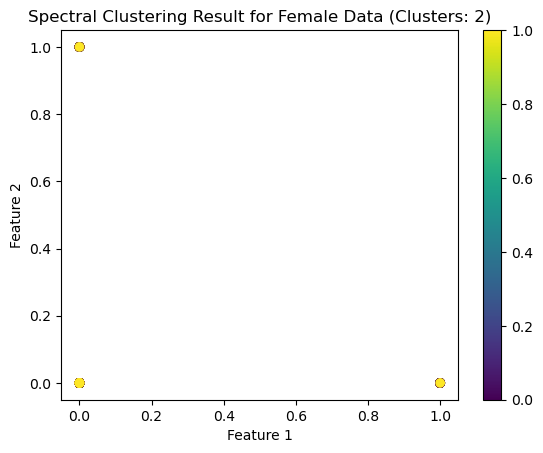

Spectral Clustering Results for Male Data:
For n_clusters = 2, the average silhouette score is: 0.5456
For n_clusters = 3, the average silhouette score is: 0.5112
For n_clusters = 4, the average silhouette score is: 0.5084
For n_clusters = 5, the average silhouette score is: 0.5064
For n_clusters = 6, the average silhouette score is: 0.4673
Optimal number of clusters for male data: 2

Spectral Clustering Results for Female Data:
For n_clusters = 2, the average silhouette score is: 0.5484
For n_clusters = 3, the average silhouette score is: 0.4980
For n_clusters = 4, the average silhouette score is: 0.5058
For n_clusters = 5, the average silhouette score is: 0.4932
For n_clusters = 6, the average silhouette score is: 0.4752
Optimal number of clusters for female data: 2


In [74]:
# spectral clustering

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
csv_file_path = '/Users/meganvaughn/Downloads/Glassdoor Gender Pay Gap.csv'
data = pd.read_csv(csv_file_path)

# Split the data into male and female subsets
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Extracting non-numeric columns as categorical columns for male and female data
categorical_cols_male = male_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols_female = female_data.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps for male and female data
preprocessor_male = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols_male)
    ],
    remainder='passthrough'
)

preprocessor_female = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols_female)
    ],
    remainder='passthrough'
)

# Preprocess the features for male and female data
X_processed_male = preprocessor_male.fit_transform(male_data)
X_processed_female = preprocessor_female.fit_transform(female_data)

# Perform spectral clustering for male data
optimal_n_clusters_male = 2  # Example, you can use the calculated optimal number of clusters
spectral_clustering_male = SpectralClustering(n_clusters=optimal_n_clusters_male, affinity='nearest_neighbors', random_state=42)
cluster_labels_male = spectral_clustering_male.fit_predict(X_processed_male)

# Plot spectral clustering result for male data
plt.scatter(X_processed_male[:, 0], X_processed_male[:, 1], c=cluster_labels_male, cmap='viridis')
plt.title(f'Spectral Clustering Result for Male Data (Clusters: {optimal_n_clusters_male})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Perform spectral clustering for female data
optimal_n_clusters_female = 2  # Example, you can use the calculated optimal number of clusters
spectral_clustering_female = SpectralClustering(n_clusters=optimal_n_clusters_female, affinity='nearest_neighbors', random_state=42)
cluster_labels_female = spectral_clustering_female.fit_predict(X_processed_female)

# Plot spectral clustering result for female data
plt.scatter(X_processed_female[:, 0], X_processed_female[:, 1], c=cluster_labels_female, cmap='viridis')
plt.title(f'Spectral Clustering Result for Female Data (Clusters: {optimal_n_clusters_female})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Perform spectral clustering for male data
range_n_clusters_male = [2, 3, 4, 5, 6]
silhouette_scores_male = []

print("Spectral Clustering Results for Male Data:")
for n_clusters in range_n_clusters_male:
    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    cluster_labels = spectral_clustering.fit_predict(X_processed_male)
    silhouette_avg = silhouette_score(X_processed_male, cluster_labels)
    silhouette_scores_male.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.4f}")

optimal_n_clusters_male = range_n_clusters_male[np.argmax(silhouette_scores_male)]
print(f"Optimal number of clusters for male data: {optimal_n_clusters_male}")

# Perform spectral clustering for female data
range_n_clusters_female = [2, 3, 4, 5, 6]
silhouette_scores_female = []

print("\nSpectral Clustering Results for Female Data:")
for n_clusters in range_n_clusters_female:
    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    cluster_labels = spectral_clustering.fit_predict(X_processed_female)
    silhouette_avg = silhouette_score(X_processed_female, cluster_labels)
    silhouette_scores_female.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.4f}")

optimal_n_clusters_female = range_n_clusters_female[np.argmax(silhouette_scores_female)]
print(f"Optimal number of clusters for female data: {optimal_n_clusters_female}")


Shape of preprocessed male data: (532, 25)
Shape of preprocessed female data: (468, 25)
Sample of preprocessed male data:
[[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 2.10000e+01 5.00000e+00 5.00000e+00 1.08476e+05
  1.11280e+04]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 2.00000e+01 5.00000e+00 4.00000e+00 1.08080e+05
  1.01540e+04]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 2.60000e

/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 (Male), the average silhouette score is: 0.5130294191560546
For n_clusters = 4 (Male), the average silhouette score is: 0.5162496972714665
For n_clusters = 5 (Male), the average silhouette score is: 0.5256406193620177


/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 (Male), the average silhouette score is: 0.49518996622384664
Optimal number of clusters for male data: 2
For n_clusters = 2 (Female), the average silhouette score is: 0.5485279780885205


/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 (Female), the average silhouette score is: 0.510373829915503
For n_clusters = 4 (Female), the average silhouette score is: 0.5095274913685824
For n_clusters = 5 (Female), the average silhouette score is: 0.49424635317429094


/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 (Female), the average silhouette score is: 0.4992168508663533
Optimal number of clusters for female data: 2


/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


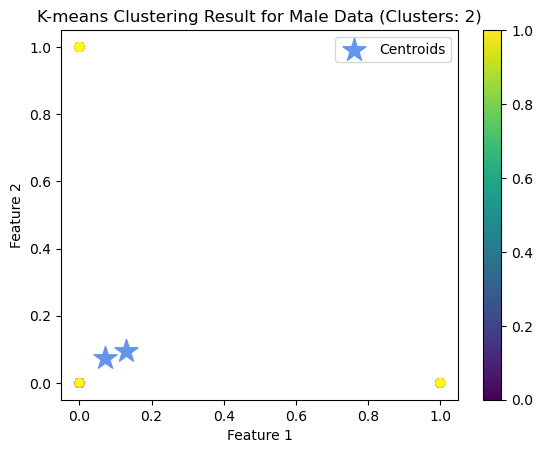

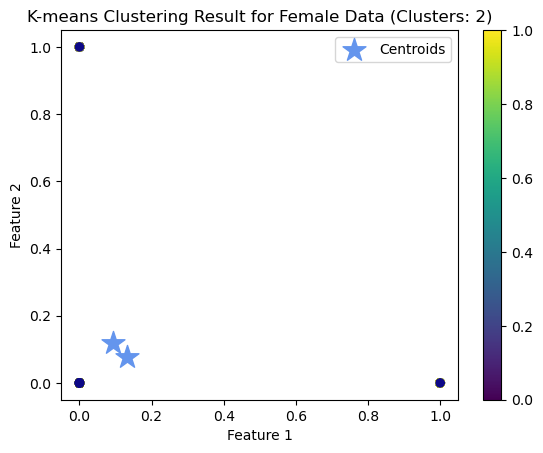

In [89]:
# k means clustering

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
csv_file_path = '/Users/meganvaughn/Downloads/Glassdoor Gender Pay Gap.csv'
data = pd.read_csv(csv_file_path)

# Split the data into male and female subsets
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Extracting non-numeric columns as categorical columns for male and female data
categorical_cols_male = male_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols_female = female_data.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps for male and female data
preprocessor_male = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols_male)
    ],
    remainder='passthrough'
)

preprocessor_female = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols_female)
    ],
    remainder='passthrough'
)

# Preprocess the features for male and female data
X_processed_male = preprocessor_male.fit_transform(male_data)
X_processed_female = preprocessor_female.fit_transform(female_data)


print("Shape of preprocessed male data:", X_processed_male.shape)
print("Shape of preprocessed female data:", X_processed_female.shape)

# Inspect a few samples of preprocessed male data
print("Sample of preprocessed male data:")
print(X_processed_male[:5])

# Inspect a few samples of preprocessed female data
print("Sample of preprocessed female data:")
print(X_processed_female[:5])

# Define a range of numbers of clusters to try
range_n_clusters = [2, 3, 4, 5, 6]

# Initialize lists to store silhouette scores and optimal number of clusters
silhouette_scores_male = []
silhouette_scores_female = []
optimal_n_clusters_male = None
optimal_n_clusters_female = None

# Loop through different numbers of clusters for male data
for n_clusters in range_n_clusters:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_processed_male)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_processed_male, cluster_labels)
    silhouette_scores_male.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters} (Male), the average silhouette score is: {silhouette_avg}")

# Find the optimal number of clusters for male data
optimal_n_clusters_male = range_n_clusters[np.argmax(silhouette_scores_male)]
print(f"Optimal number of clusters for male data: {optimal_n_clusters_male}")

# Loop through different numbers of clusters for female data
for n_clusters in range_n_clusters:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_processed_female)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_processed_female, cluster_labels)
    silhouette_scores_female.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters} (Female), the average silhouette score is: {silhouette_avg}")

# Find the optimal number of clusters for female data
optimal_n_clusters_female = range_n_clusters[np.argmax(silhouette_scores_female)]
print(f"Optimal number of clusters for female data: {optimal_n_clusters_female}")

# Apply K-means clustering with optimal number of clusters for male data
kmeans_male = KMeans(n_clusters=optimal_n_clusters_male, random_state=42)
cluster_labels_male = kmeans_male.fit_predict(X_processed_male)

# Apply K-means clustering with optimal number of clusters for female data
kmeans_female = KMeans(n_clusters=optimal_n_clusters_female, random_state=42)
cluster_labels_female = kmeans_female.fit_predict(X_processed_female)

# Plot the clustering result for male data with centroids
plt.scatter(X_processed_male[:, 0], X_processed_male[:, 1], c=cluster_labels_male, cmap='spring')
plt.scatter(kmeans_male.cluster_centers_[:, 0], kmeans_male.cluster_centers_[:, 1], s=300, c='cornflowerblue', marker='*', label='Centroids')
plt.title(f'K-means Clustering Result for Male Data (Clusters: {optimal_n_clusters_male})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.legend()
plt.show()

# Plot the clustering result for female data with centroids
plt.scatter(X_processed_female[:, 0], X_processed_female[:, 1], c=cluster_labels_female, cmap='plasma')
plt.scatter(kmeans_female.cluster_centers_[:, 0], kmeans_female.cluster_centers_[:, 1], s=300, c='cornflowerblue', marker='*', label='Centroids')
plt.title(f'K-means Clustering Result for Female Data (Clusters: {optimal_n_clusters_female})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.legend()
plt.show()





/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9517377536.0000 - val_loss: 9245394944.0000
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9643018240.0000 - val_loss: 9222652928.0000
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9527646208.0000 - val_loss: 9171393536.0000
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9216134144.0000 - val_loss: 9071098880.0000
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9431699456.0000 - val_loss: 8899126272.0000
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9272471552.0000 - val_loss: 8640323584.0000
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8837728256.0000 - val_loss: 8279440384.0000
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8438584832.0000 - val_loss: 7806589440.0000
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7983575552.0000 - val_loss: 7218782208.0000
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7470205952.0000 - val

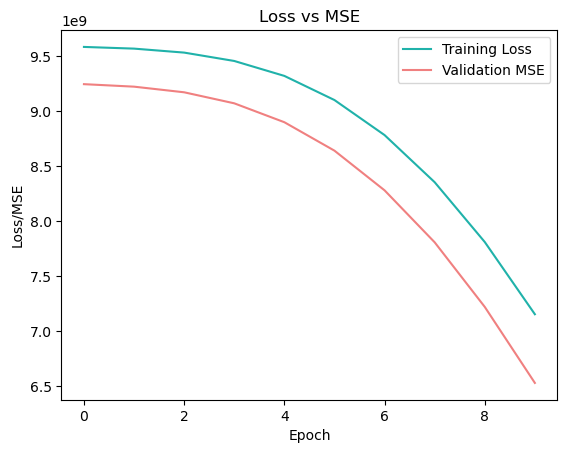

In [66]:
# cnn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.metrics import MeanSquaredError
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
csv_file_path = '/Users/meganvaughn/Downloads/Glassdoor Gender Pay Gap.csv'
data = pd.read_csv(csv_file_path)

# Assuming 'BasePay' is the target variable
target_column = 'BasePay'

# Extracting non-numeric columns as categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Remove the target column from the list of categorical columns if it's present
if target_column in categorical_cols:
    categorical_cols.remove(target_column)

# Separating features and target variable
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target variable

# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)
X_processed = preprocessor.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Reshape data for CNN input (assuming X_train and X_test are 2D arrays)
n_features = X_train.shape[1]  # Number of features after one-hot encoding

# Reshape data for 1D CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_features, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # Assuming it's a regression problem, you may need to change this based on your task
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for regression

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Plot loss versus MSE
plt.plot(history.history['loss'], label='Training Loss', color='lightseagreen')
plt.plot(history.history['val_loss'], label='Validation MSE', color='lightcoral')
plt.xlabel('Epoch')
plt.ylabel('Loss/MSE')
plt.title('Loss vs MSE')
plt.legend()
plt.show()


Epoch 1/10


/Users/meganvaughn/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9537742848.0000 - val_loss: 8513298432.0000
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8566194688.0000 - val_loss: 7302814720.0000
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7463686656.0000 - val_loss: 5250487808.0000
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4865720320.0000 - val_loss: 2926100992.0000
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2780562944.0000 - val_loss: 1661103232.0000
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1608840320.0000 - val_loss: 1537989504.0000
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1577142528.0000 - val_loss: 1541173376.0000
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1729822720.0000 - val_loss: 1536525568.0000
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1527928704.0000 - val_loss: 1530213760.0000
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1559807872.0000 - val_loss: 15339

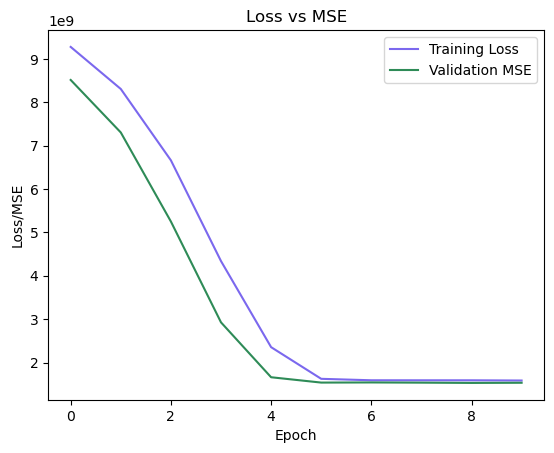

In [68]:
# fnn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
csv_file_path = '/Users/meganvaughn/Downloads/Glassdoor Gender Pay Gap.csv'
data = pd.read_csv(csv_file_path)

# Assuming 'BasePay' is the target variable
target_column = 'BasePay'

# Extracting non-numeric columns as categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Remove the target column from the list of categorical columns if it's present
if target_column in categorical_cols:
    categorical_cols.remove(target_column)

# Separating features and target variable
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target variable

# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)
X_processed = preprocessor.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the FNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Assuming it's a regression problem, you may need to change this based on your task
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for regression

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot loss versus MSE
plt.plot(history.history['loss'], label='Training Loss', color='mediumslateblue')
plt.plot(history.history['val_loss'], label='Validation MSE', color='seagreen')
plt.xlabel('Epoch')
plt.ylabel('Loss/MSE')
plt.title('Loss vs MSE')
plt.legend()
plt.show()

